**<h1>Phân tích độ hài lòng của khách hàng sử dụng dịch vụ hàng không</h1>**

<img width="700" height="350" src="https://img.pikbest.com/png-images/20211009/airport-queue-vector-illustration_6138835.png!bw700"> </p>

> Việc phân tích phản hồi của khách hàng sẽ giúp ích rất nhiều cho các hãng hàng không hiểu chính xác hơn khách hàng của họ cần gì và họ có thể cải thiện tốt hơn ở đâu.
  
> Hơn nữa, việc dự đoán mức độ hài lòng của khách hàng cũng hỗ trợ CRM (Quản lý quan hệ khách hàng) trong các hãng hàng không






# **<h2>Giới thiệu về tổng quan dữ liệu - Data Overview**




<h2>Tập dữ liệu này bao gồm một cuộc khảo sát về sự hài lòng của hành khách đi máy bay. Cần dự đoán mức độ hài lòng của hành khách đối với hãng hàng không thuộc về mức độ nào trong hai mức độ sau:<h2>

1. **Hài Lòng (Satisfaction)**
2. **Trung Lập hoặc Không Hài Lòng (Neutral or dissatisfied)**

___

<h2>Thông tin về các biến trong tập dữ liệu bao gồm:<h2>

- **Gender**: Giới tính của khách hàng (Female, Male)
- **Customer Type**: Loại khách hàng (Loyal customer, disloyal customer)
- **Age**: Độ tuổi của khách hàng
- **Type of Travel**: Mục đích chuyến bay của khách hàng (Personal Travel, Business Travel)
- **Class**: Hạng toa trên máy bay của khách hàng (Business, Eco, Eco Plus)
- **Flight distance**: Quãng đường bay của chuyến bay
- **Inflight wifi service**: Mức độ hài lòng về dịch vụ wifi trên máy bay (0-5)
- **Departure/Arrival time convenient**: Mức độ hài lòng về giờ xuất phát/kết thúc chuyến bay (0-5)
- **Ease of Online booking**: Mức độ hài lòng khi đặt vé trực tuyến (0-5)
- **Gate location**: Mức độ hài lòng về vị trí cổng sân bay (0-5)
- **Food and drink**: Mức độ hài lòng về đồ ăn thức uống (0-5)
- **Online boarding**: Mức độ hài lòng về việc làm thủ tục trực tuyến (0-5)
- **Seat comfort**: Mức độ hài lòng về chỗ ngồi (0-5)
- **Inflight entertainment**: Mức độ hài lòng về giải trí trên chuyến bay (0-5)
- **On-board service**: Mức độ hài lòng về dịch vụ trên máy bay (0-5)
- **Leg room service**: Mức độ hài lòng về chỗ để chân trên máy bay (0-5)
- **Baggage handling**: Mức độ hài lòng về dịch vụ xử lý hành lý (0-5)
- **Check-in service**: Mức độ hài lòng về việc làm thủ túc trước khi lên máy bay (0-5)
- **Inflight service**: Mức độ hài lòng về dịch vụ hỗ trợ xuyên suốt chuyến bay (0-5)
- **Cleanliness**: Mức độ hài lòng về sự sạch sẽ trên chuyến bay (0-5)
- **Departure Delay in Minutes**: Số phút trễ khi khởi hành (minutes)
- **Arrival Delay in Minutes**: Số phút trễ khi đến điểm hạ cánh (minutes)

----

<h2>Mục tiêu của bài phân tích: <h2>

***- Những yếu tố nào ảnh hưởng đến sự hài lòng của khách hàng đối với một Hãng hàng không?***

***- Lựa chọn các mô hình dự đoán tốt nhất để dự đoán sự hài lòng của khách hàng?***

***- Đưa ra một số đánh giá và đề xuất giải pháp hữu hiệu cho các Hãng hàng không.***

***


In [ ]:
#Import thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

####Import Data

In [ ]:
link='https://drive.google.com/file/d/10Q0JS3yZGjA-x28nrOY8_pHWsH-XRLhr/view?usp=sharing'
#Đọc data
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df = pd.read_csv(path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

In [ ]:
#df.head()
df.sample(10)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
40416,94301,Female,disloyal Customer,28,Business travel,Business,293,2,2,2,...,5,4,2,4,3,5,5,4,0.0,neutral or dissatisfied
115303,95420,Male,disloyal Customer,20,Business travel,Eco,323,2,0,1,...,5,3,2,4,4,4,5,29,19.0,neutral or dissatisfied
33939,46421,Female,Loyal Customer,35,Business travel,Business,3026,1,1,4,...,3,3,3,3,3,3,4,5,26.0,satisfied
115128,20000,Male,Loyal Customer,36,Business travel,Eco,589,4,2,2,...,4,5,4,4,4,5,4,0,0.0,satisfied
105784,37189,Male,Loyal Customer,33,Business travel,Eco Plus,1237,4,3,1,...,4,3,4,1,1,4,4,0,0.0,satisfied
127879,9577,Female,Loyal Customer,38,Business travel,Business,288,3,2,2,...,3,3,3,3,1,3,3,0,10.0,neutral or dissatisfied
17257,1291,Male,Loyal Customer,35,Personal Travel,Eco,158,0,4,0,...,4,5,4,5,3,5,4,0,0.0,satisfied
64529,27525,Male,Loyal Customer,60,Personal Travel,Eco,672,5,4,4,...,4,1,3,3,4,2,4,0,0.0,satisfied
105801,3076,Male,Loyal Customer,46,Business travel,Business,2504,4,4,4,...,3,3,2,3,4,3,5,0,5.0,satisfied
101965,19078,Male,Loyal Customer,56,Personal Travel,Eco,642,1,5,1,...,2,4,3,4,3,5,2,31,27.0,neutral or dissatisfied


# **<h2>Tiến hành xử lý dữ liệu đầu vào - Data Cleansing**

#####Xóa cột id

In [ ]:
df = df.drop(['id'], axis=1)

####Xử lý missing data ở cột Arrival Delay in Minutes

In [ ]:
#check gia tri nan
df.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [ ]:
#Tính trung bình của biến Arrival Delay in Minutes
print("Giá trị trung bình của biến Arrival Delay in Minutes là:","%.2f" % df["Arrival Delay in Minutes"].mean(axis=0))

Giá trị trung bình của biến Arrival Delay in Minutes là: 15.09


In [ ]:
#Thay NaN bằng giá trị trung bình
df["Arrival Delay in Minutes"].replace(np.nan, "%.2f" % df["Arrival Delay in Minutes"].mean(axis=0), inplace=True)

####Kiểm tra sự mất cân bằng dữ liệu

In [ ]:
df['satisfaction'].value_counts()

neutral or dissatisfied    73452
satisfied                  56428
Name: satisfaction, dtype: int64

<Axes: xlabel='satisfaction', ylabel='count'>

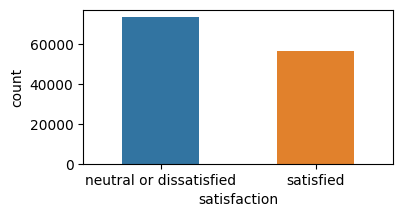

In [ ]:
 plt.figure(figsize=(4,2))
 sns.countplot(x="satisfaction", data=df, width=0.5)

***=> Biểu đồ trên cho thấy tỷ lệ phân bổ tương ứng là khoảng 55%:45% giữa hành khách trung lập/không hài lòng và hành khách hài lòng. Do vậy, dữ liệu khá cân bằng không cần thiết phải xử lý.***

# **<h2>Tiến hành phân tích khám phá dữ liệu - Exploratory Data Analysis**

In [ ]:
#Mã hóa dữ liệu biến satisfaction
df["satisfaction"]=[1 if i=="satisfied" else 0 for i in df.satisfaction]

In [ ]:
#df

**<h3>Phân tích ảnh hưởng của một số biến độc lập đến biến phụ thuộc (satisfaction)**

######Nhóm biến về khách hàng

**Age, Gender, Customer Type -> Satisfaction**

In [ ]:
#Age vs satisfaction
df[["Age","satisfaction"]].groupby(["Age"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Age,satisfaction
34,41,0.609259
44,51,0.603600
39,46,0.602671
46,53,0.588978
45,52,0.587149
...,...,...
62,69,0.140175
3,10,0.135036
63,70,0.127937
1,8,0.101631


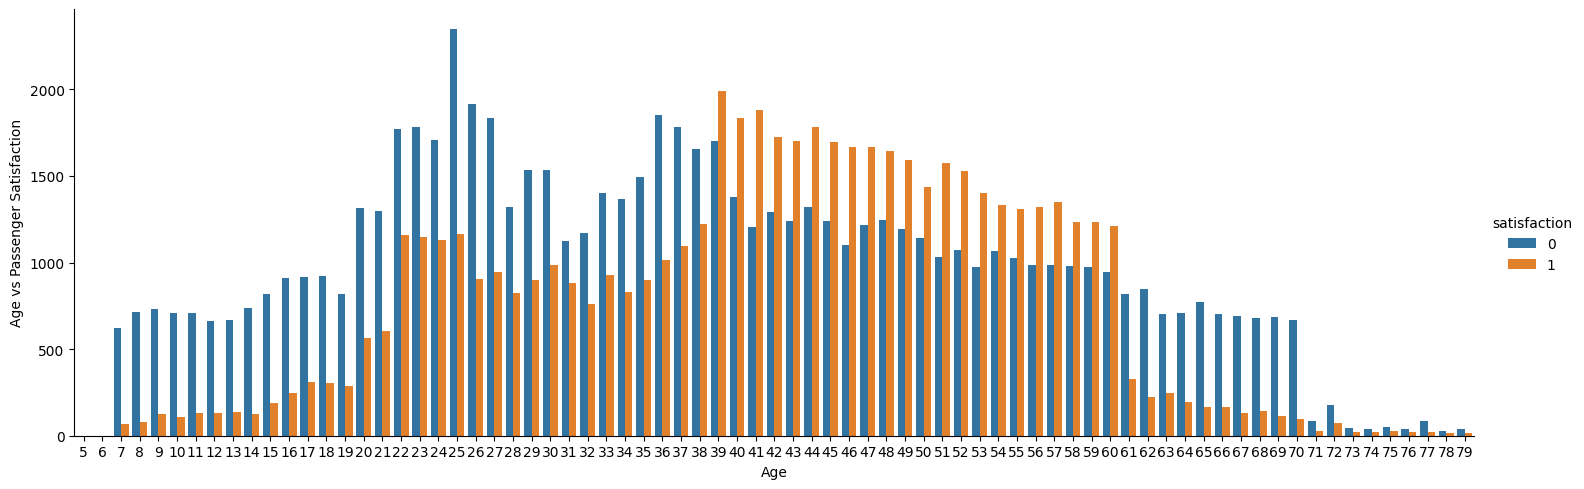

In [ ]:
ax = sns.catplot(x="Age", data=df, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80))
ax.set_ylabels('Age vs Passenger Satisfaction')

***Nhóm từ 7 đến 38 tuổi và từ 61 đến 79 tuổi, tỷ lệ hành khách không hài lòng rất cao so với hành khách hài lòng. Ngược lại, ở nhóm tuổi 39-60, tỷ lệ hành khách hài lòng cao hơn so với hành khách không hài lòng.***

In [ ]:
#Gender vs satisfaction
df[["Gender","satisfaction"]].groupby(["Gender"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Gender,satisfaction
1,Male,0.440115
0,Female,0.428975


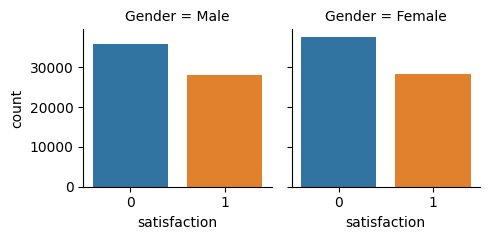

In [ ]:
#Độ hài lòng của khách hàng phân bổ theo giới tính
ax = sns.catplot(x="satisfaction", col="Gender", col_wrap=2, data=df, kind="count", height=2.5, aspect=1.0)

***Tỷ lệ hài lòng của hành khách nam %44, tỷ lệ hài lòng của hành khách nữ %43. Có thể thấy tỷ lệ không hài lòng cao hơn tỷ lệ hài lòng ở cả nam và nữ***

In [ ]:
#Customer type vs satisfaction
df[["Customer Type","satisfaction"]].groupby(["Customer Type"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Customer Type,satisfaction
0,Loyal Customer,0.478115
1,disloyal Customer,0.239697


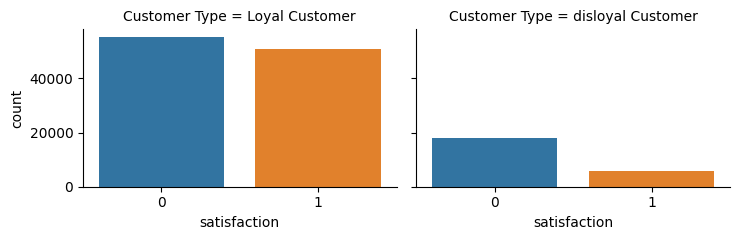

In [ ]:
#Độ hài lòng của khách hàng phân bổ theo loại khách hàng
ax = sns.catplot(x="satisfaction", col="Customer Type", col_wrap=2, data=df, kind="count", height=2.5, aspect=1.5)

***Số lượng hành khách trung thành có tỷ lệ hài lòng khá cao, khoảng 48%. Trong khi đó những hành khách không trung thành có tỷ lệ hài lòng khá thấp, khoảng 24%. Nhưng cả 2 nhóm khách hàng này đều có tỉ lệ không hài lòng cao hơn tỷ lệ hài lòng***

######Nhóm biến về tính chất chuyến bay

**Flight Distance, Type of Travel, Class -> Satisfaction**

In [ ]:
#Type of Travel vs satisfaction
df[["Type of Travel","satisfaction"]].groupby(["Type of Travel"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Type of Travel,satisfaction
0,Business travel,0.583724
1,Personal Travel,0.101326


***Mục đích chuyến bay là công tác kinh doanh thì khách hàng sẽ có sự hài lòng lớn hơn (58%) so với nhóm khách hàng đi du lịch cá nhân (chỉ khoảng 10%)***

In [ ]:
#Class vs satisfaction
df[["Class","satisfaction"]].groupby(["Class"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Class,satisfaction
0,Business,0.694434
2,Eco Plus,0.246414
1,Eco,0.187673


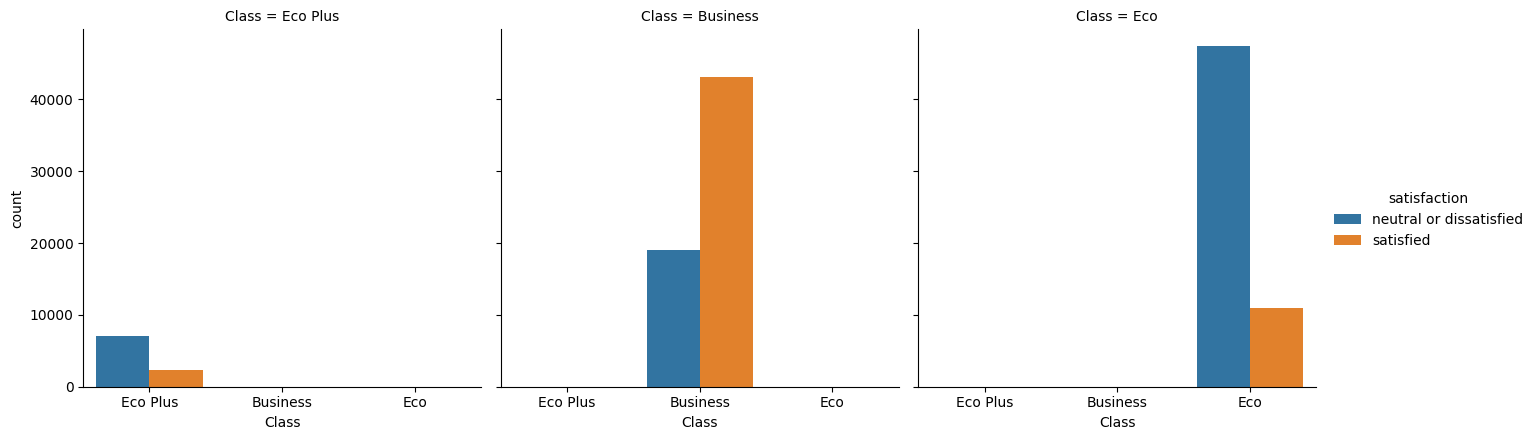

In [ ]:
 ax = sns.catplot(x="Class"
 , hue="satisfaction", col="Class", data=df, kind="count", height=4.5, aspect=1)

***Khách hàng sử dụng hạng thương gia (business) sẽ có sự hài lòng lớn hơn so với những khách hàng sử dụng hạng Eco và Eco Plus. Thật thú vị khi có sự khác biệt khá lớn về mức độ hài lòng giữa hạng eco và business.***

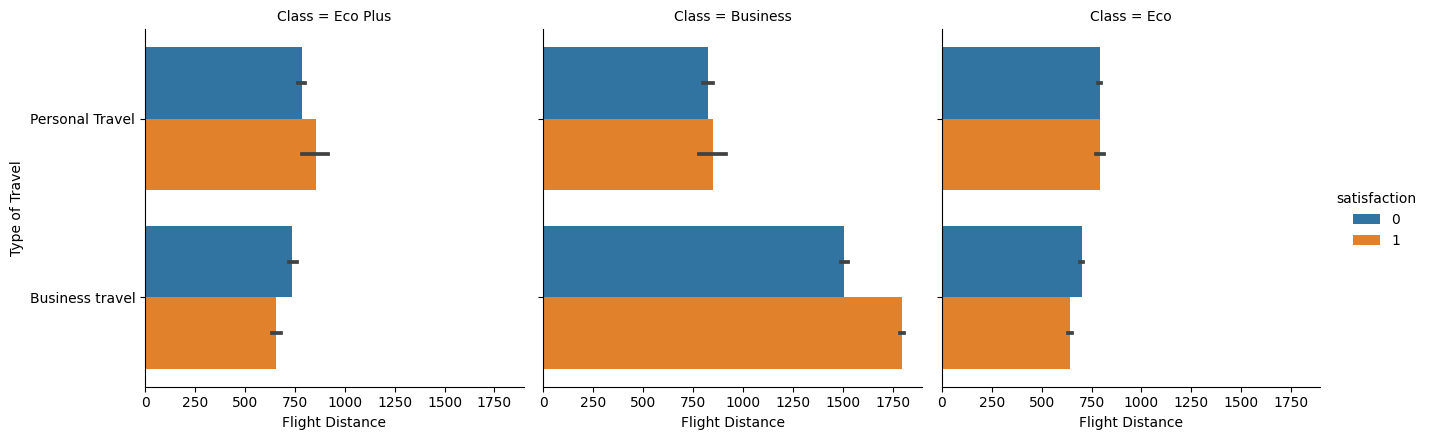

In [ ]:
 #Độ hài lòng của khách hàng dựa vào độ dài đường bay, hạng toa bay, và mục đích chuyến bay.
 ax = sns.catplot(x="Flight Distance", y="Type of Travel", hue="satisfaction", col="Class", data=df, kind="bar", height=4.5, aspect=1)

***Đối với các chuyến công tác ở hạng thương gia (business travel), số lượng hành khách hài lòng khá cao vì quãng đường bay dài hơn. Đối với các hạng khác và các độ dài khác nhau của chuyến bay, hành khách hài lòng và không hài lòng có sự phân bổ gần như bằng nhau.***

######Nhóm biến về dịch vụ trong chuyến bay

**Inflight wifi service, Food and drink, Seat comfort, Inflight entertainment, Leg room service, On-board service, Cleanliness -> Satisfaction**

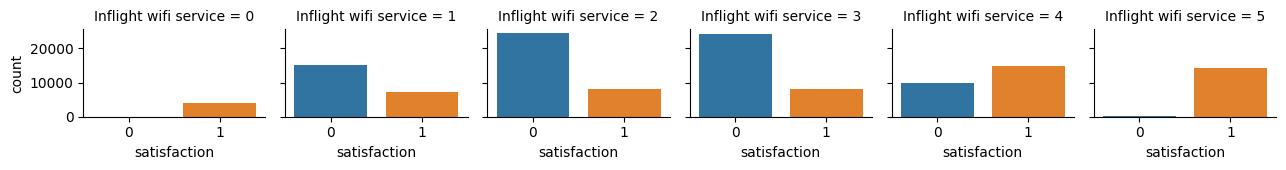

In [ ]:
#Inflight wifi service vs Satisfaction
ax = sns.catplot(x="satisfaction", col="Inflight wifi service", data=df, kind="count", height=1.8, aspect=1.2)

***Tất cả những người cho điểm 0 và điểm 5 với dịch vụ wifi trên máy bay đều hài lòng với chuyến bay. Có vẻ như dịch vụ wifi cũng không quan trọng lắm, có cũng được mà không có cũng không sao.***

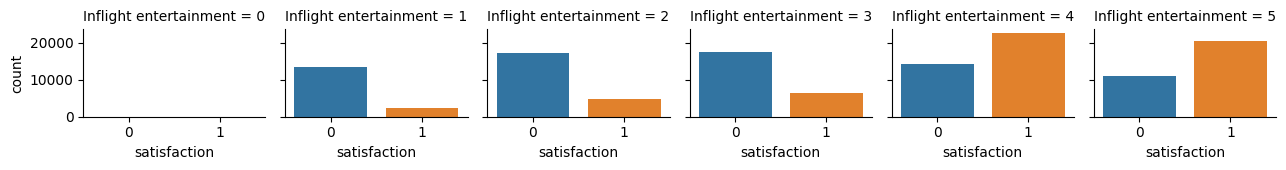

In [ ]:
#Inflight entertainment vs Satisfaction
ax = sns.catplot(x="satisfaction", col="Inflight entertainment", data=df, kind="count", height=1.8, aspect=1.2)

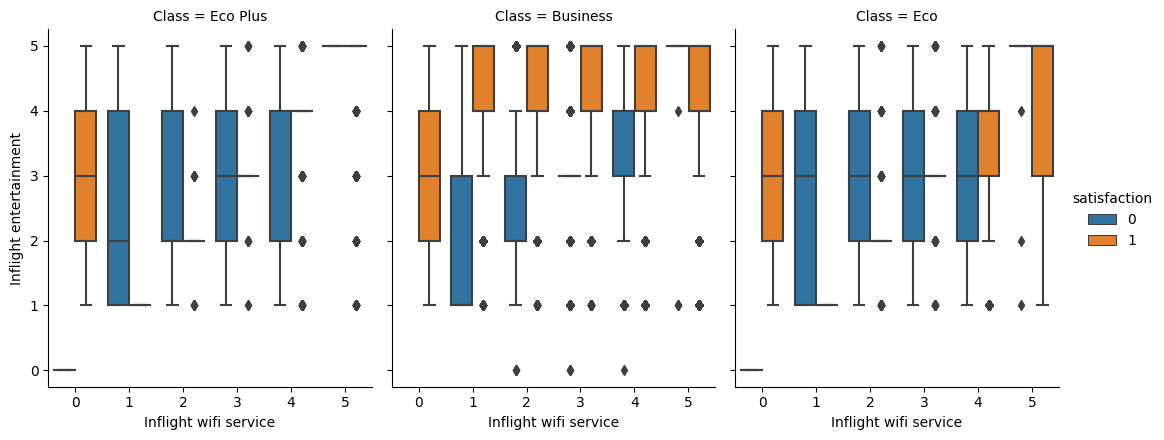

In [ ]:
#Inflight wifi service, Inflight entertainment by class vs satisfaction
ax = sns.catplot(x="Inflight wifi service", y="Inflight entertainment", hue="satisfaction", col="Class", data=df, kind="box", height=4.5, aspect=.8)

***Thật thú vị khi thấy rằng hành khách hạng Eco Plus hầu hết hài lòng khi không có dịch vụ wi-fi trên chuyến bay (điểm 0) và giải trí trên máy bay ở mức trung bình (điểm từ 2 - 4). Đối với hành khách hạng Thương gia, chỉ có dịch vụ giải trí trên máy bay ở mức cao nhất (điểm 5) mới có thể khiến họ hài lòng. Đối với hành khách Eco, mức độ giải trí trên chuyến bay cao (điểm từ 3 - 5) và tính khả dụng của dịch vụ wi-fi rất cao (điểm 5) có thể khiến họ hài lòng***

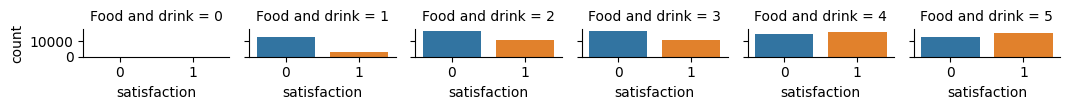

In [ ]:
#Food and drink vs Satisfaction
ax = sns.catplot(x="satisfaction", col="Food and drink", data=df, kind="count", height=1.2, aspect=1.5)

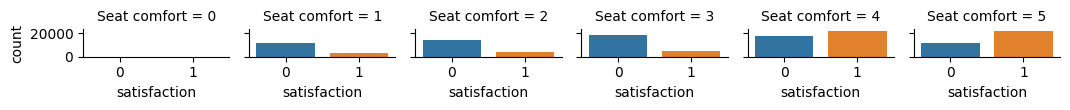

In [ ]:
#Seat comfort vs Satisfaction
ax = sns.catplot(x="satisfaction", col="Seat comfort", data=df, kind="count", height=1.2, aspect=1.5)

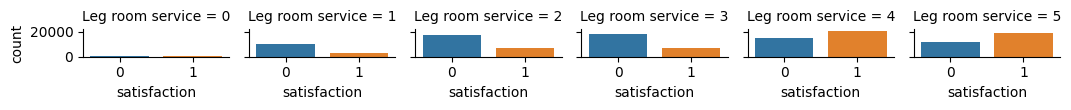

In [ ]:
#Leg room service vs Satisfaction
ax = sns.catplot(x="satisfaction", col="Leg room service", data=df, kind="count", height=1.2, aspect=1.5)

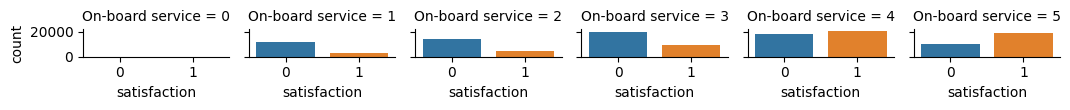

In [ ]:
#On-board service vs Satisfaction
ax = sns.catplot(x="satisfaction", col="On-board service", data=df, kind="count", height=1.2, aspect=1.5)

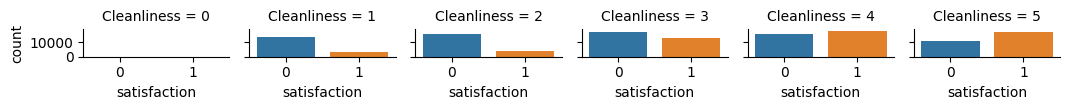

In [ ]:
#Cleanliness vs Satisfaction
ax = sns.catplot(x="satisfaction", col="Cleanliness", data=df, kind="count", height=1.2, aspect=1.5)

 ***Đối với tất cả các tính năng này, hành khách hài lòng thuộc nhóm người cho điểm 4 và 5. Dưới mức 4, hành khách hầu hết không hài lòng.***

######Nhóm biến về dịch vụ trước chuyến bay

**Ease of Online booking, Online boarding, Baggage handling, Checkin service -> Satisfaction**

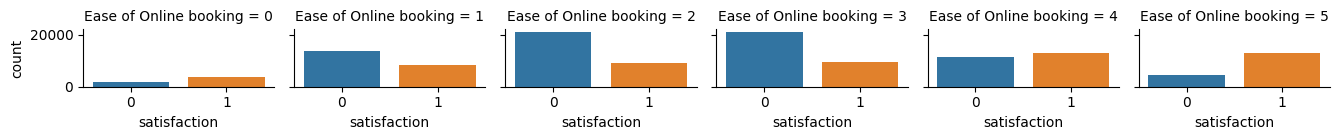

In [ ]:
#Ease of Online booking vs Satisfaction
ax = sns.catplot(x="satisfaction", col="Ease of Online booking", data=df, kind="count", height=1.5, aspect=1.5)

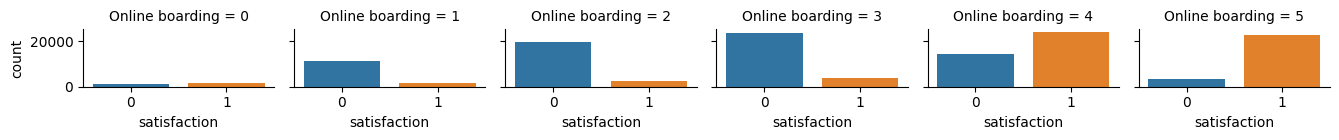

In [ ]:
#Online boarding vs Satisfaction
ax = sns.catplot(x="satisfaction", col="Online boarding", data=df, kind="count", height=1.5, aspect=1.5)

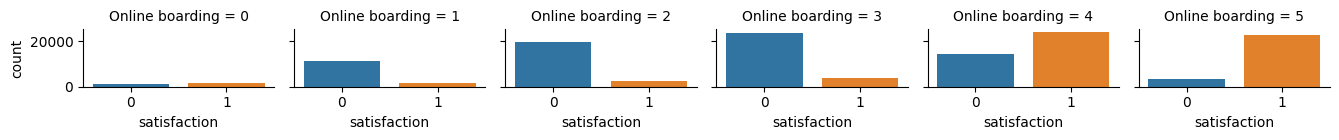

In [ ]:
#Baggage handling vs Satisfaction
ax = sns.catplot(x="satisfaction", col="Online boarding", data=df, kind="count", height=1.5, aspect=1.5)

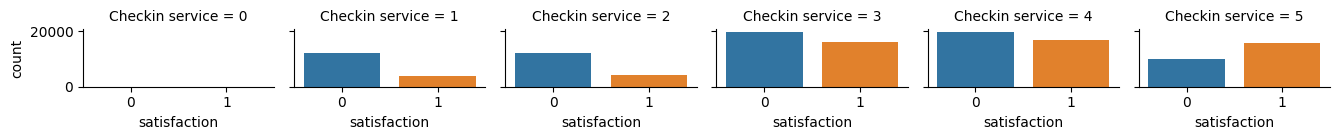

In [ ]:
#Checkin service vs Satisfaction
ax = sns.catplot(x="satisfaction", col="Checkin service", data=df, kind="count", height=1.5, aspect=1.5)

***Đối với dịch vụ đăng ký (checkin service), những người cho điểm 0-2 chủ yếu là không hài lòng. Đối với tất cả các dịch vụ còn lại, chỉ có người cho điểm 4 và 5 là hành khách hài lòng.***

# **<h2>Xây dựng mô hình - Bulding Models**

#### Tiến hành mã hóa và chuẩn hóa dữ liệu

Chia thành 2 bảng data:
1.  các biến liên tục
2.  các biến rời rạc
--------------------------------------------------------------------------------

#####1. Bảng data chứa các biến rời rạc

In [ ]:
#tao bang data chua cac bien roi rac
df_categorical = df.iloc[:,[0, 1, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 22]] #bỏ 4 cột dữ liệu liên tục
df_categorical.head()

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,3,4,3,1,5,3,5,5,4,3,4,4,5,5,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,3,2,3,3,1,3,1,1,1,5,3,1,4,1,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,2,2,2,2,5,5,5,5,4,3,4,4,4,5,satisfied
3,Female,Loyal Customer,Business travel,Business,2,5,5,5,2,2,2,2,2,5,3,1,4,2,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,3,3,3,3,4,5,5,3,3,4,4,3,3,3,satisfied


In [ ]:
# đếm các giá trị unique của từng cột
for i in df_categorical.columns:
  unique_values = df_categorical[i].unique()
  unique_values.sort()
  print("biến " + i + " có" ,len(unique_values), "giá trị khác nhau")
  print("bao gồm", unique_values)
  print(df[i].value_counts(ascending=True))
  print('------------------------------------------')

biến Gender có 2 giá trị khác nhau
bao gồm ['Female' 'Male']
Male      63981
Female    65899
Name: Gender, dtype: int64
------------------------------------------
biến Customer Type có 2 giá trị khác nhau
bao gồm ['Loyal Customer' 'disloyal Customer']
disloyal Customer     23780
Loyal Customer       106100
Name: Customer Type, dtype: int64
------------------------------------------
biến Type of Travel có 2 giá trị khác nhau
bao gồm ['Business travel' 'Personal Travel']
Personal Travel    40187
Business travel    89693
Name: Type of Travel, dtype: int64
------------------------------------------
biến Class có 3 giá trị khác nhau
bao gồm ['Business' 'Eco' 'Eco Plus']
Eco Plus     9411
Eco         58309
Business    62160
Name: Class, dtype: int64
------------------------------------------
biến Inflight wifi service có 6 giá trị khác nhau
bao gồm [0 1 2 3 4 5]
0     3916
5    14356
1    22328
4    24775
3    32185
2    32320
Name: Inflight wifi service, dtype: int64
-----------------------

Mã hóa dữ liệu ở các cột gender, Customer Type, Type of Travel, Class

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder #Thư viện mã hóa LabelEncoder
df_categorical.iloc[:,[0, 1, 2, 3, -1]] = df_categorical.iloc[:,[0, 1, 2, 3, -1]].apply(LabelEncoder().fit_transform)

<ipython-input-60-4751af603146>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical.iloc[:,[0, 1, 2, 3, -1]] = df_categorical.iloc[:,[0, 1, 2, 3, -1]].apply(LabelEncoder().fit_transform)
<ipython-input-60-4751af603146>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_categorical.iloc[:,[0, 1, 2, 3, -1]] = df_categorical.iloc[:,[0, 1, 2, 3, -1]].apply(LabelEncoder().fit_transform)


In [ ]:
df_categorical.head(10)

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,1,0,1,2,3,4,3,1,5,3,5,5,4,3,4,4,5,5,0
1,1,1,0,0,3,2,3,3,1,3,1,1,1,5,3,1,4,1,0
2,0,0,0,0,2,2,2,2,5,5,5,5,4,3,4,4,4,5,1
3,0,0,0,0,2,5,5,5,2,2,2,2,2,5,3,1,4,2,0
4,1,0,0,0,3,3,3,3,4,5,5,3,3,4,4,3,3,3,1
5,0,0,1,1,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0
6,1,0,1,1,2,4,2,3,2,2,2,2,3,3,4,3,5,2,0
7,0,0,0,0,4,3,4,4,5,5,5,5,5,5,5,4,5,4,1
8,0,0,0,0,1,2,2,2,4,3,3,1,1,2,1,4,1,2,0
9,1,1,0,1,3,3,3,4,2,3,3,2,2,3,4,4,3,2,0


#####2. Bảng data chứa các biến liên tục

In [ ]:
#tao bang data chua cac bien lien tuc
df_numerical = df.iloc[:,[2, 5, 20, 21]]
df_numerical

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,13,460,25,18.0
1,25,235,1,6.0
2,26,1142,0,0.0
3,25,562,11,9.0
4,61,214,0,0.0
...,...,...,...,...
129875,34,526,0,0.0
129876,23,646,0,0.0
129877,17,828,0,0.0
129878,14,1127,0,0.0


Chuẩn hóa dữ liệu các biến liên tục

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler #Thư viện
scaler = MinMaxScaler()#Gọi thư viện ra đặt tên biến cho nó
scaler.fit(df_numerical)#fit

df_numerical = pd.DataFrame(scaler.transform(df_numerical), columns=df_numerical.columns)
df_numerical.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.076923,0.086632,0.015704,0.011364
1,0.230769,0.041195,0.000628,0.003788
2,0.243590,0.224354,0.000000,0.000000
3,0.230769,0.107229,0.006910,0.005682
4,0.692308,0.036955,0.000000,0.000000


In [ ]:
df_numerical.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000
mean,0.415743,0.234111,0.009242,0.009527
std,0.193838,0.201424,0.023914,0.024247
min,0.000000,0.000000,0.000000,0.000000
25%,0.256410,0.077342,0.000000,0.000000
50%,0.423077,0.164176,0.000000,0.000000
75%,0.564103,0.345921,0.007538,0.008207
max,1.000000,1.000000,1.000000,1.000000


##### Ghép 2 bảng rời rạc và liên tục thành 1 bảng

In [ ]:
df_cleaned = pd.concat((df_numerical, df_categorical), axis = 1)
df_cleaned.sample(10)

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
94001,0.589744,0.033320,0.048367,0.056818,0,0,0,1,2,2,...,4,4,2,2,2,2,3,2,3,0
78029,0.230769,0.238288,0.000000,0.000000,1,1,0,1,3,3,...,3,4,2,4,5,5,5,4,2,0
103120,0.666667,0.061793,0.000000,0.000000,0,0,0,0,2,2,...,5,5,5,5,5,5,3,5,4,1
30806,0.474359,0.161147,0.031407,0.038510,0,0,0,1,2,2,...,2,3,2,2,2,2,1,2,2,0
24574,0.025641,0.113691,0.000000,0.000000,1,0,1,1,1,5,...,1,5,5,3,3,4,4,4,5,0
115723,0.615385,0.215065,0.000000,0.000000,0,0,1,1,1,2,...,2,3,3,3,1,3,4,3,4,0
82536,0.282051,0.077342,0.000000,0.000000,1,0,1,1,2,2,...,2,2,3,1,2,3,4,4,3,0
20423,0.705128,0.034935,0.000000,0.000000,1,0,1,1,4,5,...,4,2,2,3,1,1,4,2,2,0
21111,0.461538,0.092892,0.104899,0.100379,1,0,1,1,3,4,...,3,3,5,1,1,5,3,5,3,0
5103,0.474359,0.070073,0.000000,0.000000,1,0,1,1,3,5,...,3,2,2,3,5,5,5,5,2,0


#### Corelation Matrix

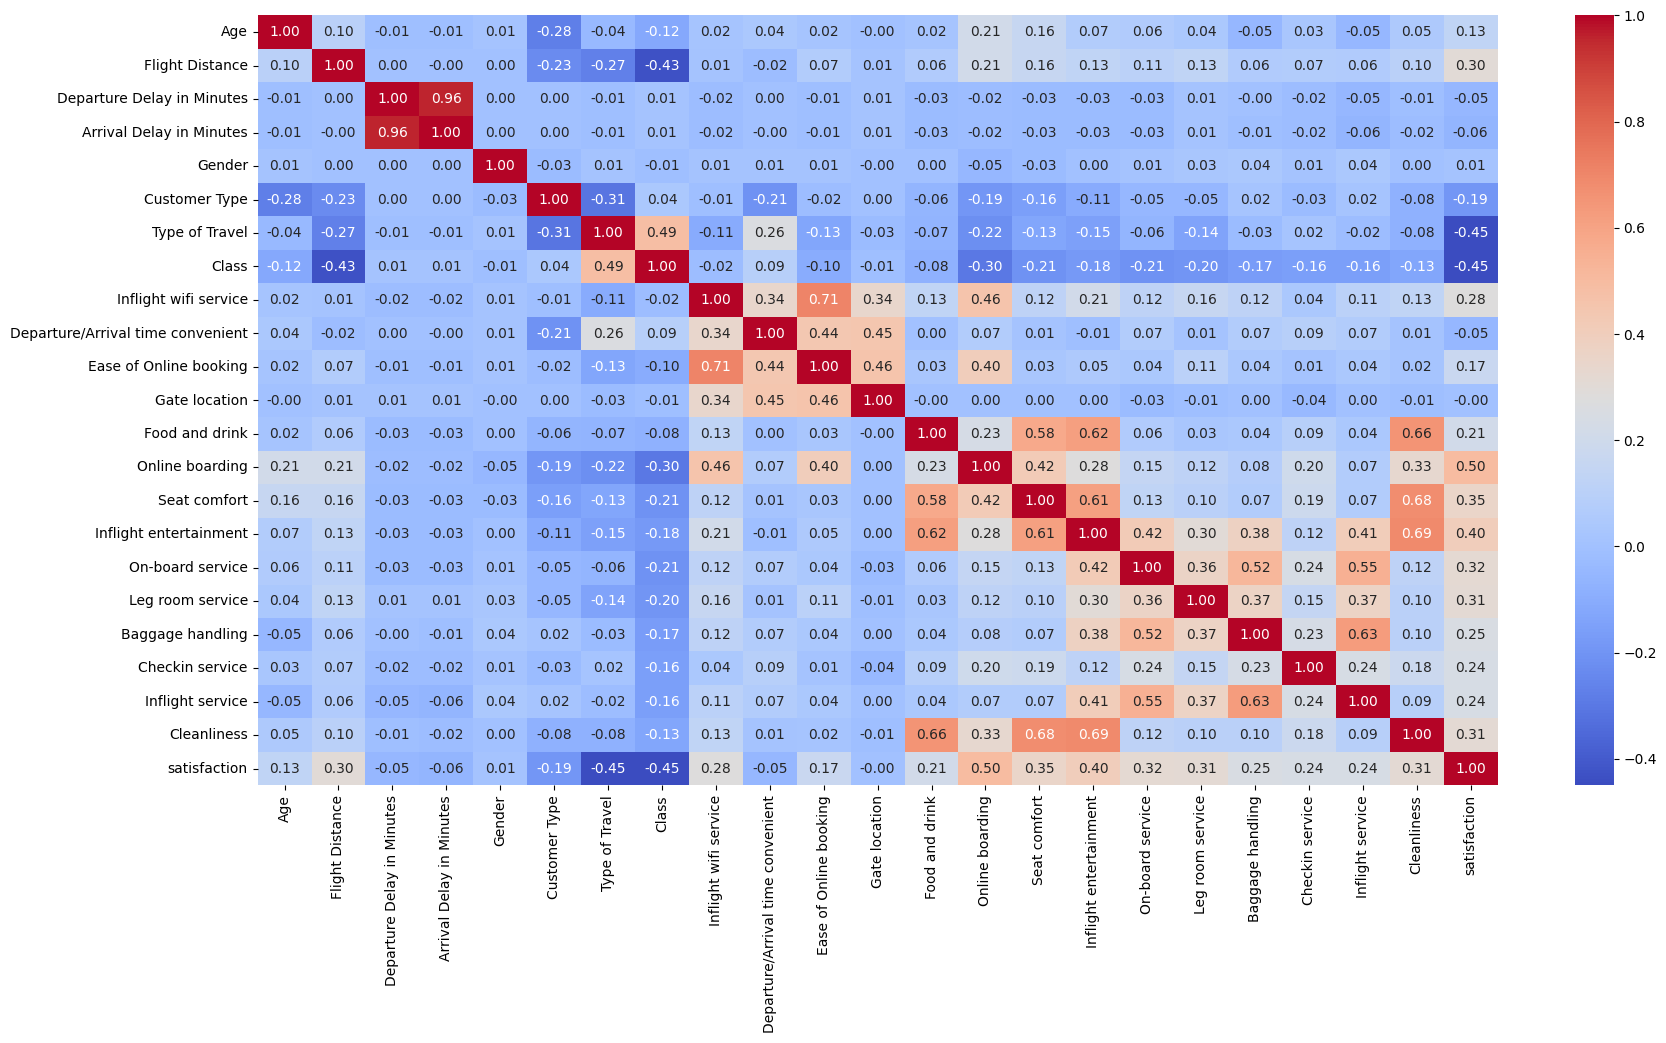

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df_cleaned.corr().round(2),annot=True,cmap = 'coolwarm',fmt=".2f")
plt.show()

***Không loại bỏ bất kì biến nào bởi không tồn tại sự tương quan tuyệt đối giữa 2 biến nào cả.***

#### Xây dựng mô hình

**Sử dụng 6 mô hình để đánh giá và so sánh:**

1. Logistic Regression

2. Gaussian Naive Bayes Classifier

3. Decision Tree Classifer

4. Random Forest Classifer

5. KNeighbors Classifer

6. LightGBM (Light Gradient Boosting Machine) Classifier



In [ ]:
#Import các thư viện
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve

Chia tập train và test

In [ ]:
#Chọn X, y
X = df_cleaned.iloc[:, 0:-1].values #lấy hết tất cả các biến trừ biến 'satisfaction'
y = df_cleaned['satisfaction'].values

In [ ]:
#Chia training, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#####1. Logistic Regression

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("Độ chính xác của mô hình là: {}%".format(round(accuracy_score(y_test, y_pred_lr)*100,2)))

Độ chính xác của mô hình là: 87.26%


Text(0.5, 23.52222222222222, 'Dự báo')

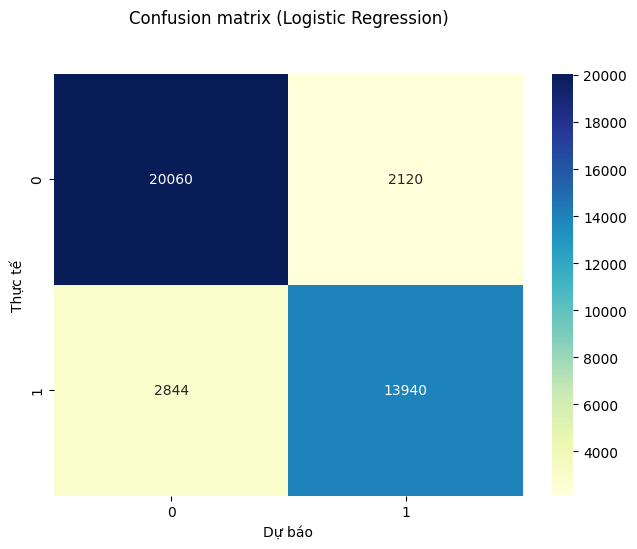

In [ ]:
#Vẽ confusion matrix
import seaborn as sns
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix (Logistic Regression)', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')

In [ ]:
#In ra báo cáo đánh giá của mô hình (f1 score)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     22180
           1       0.87      0.83      0.85     16784

    accuracy                           0.87     38964
   macro avg       0.87      0.87      0.87     38964
weighted avg       0.87      0.87      0.87     38964



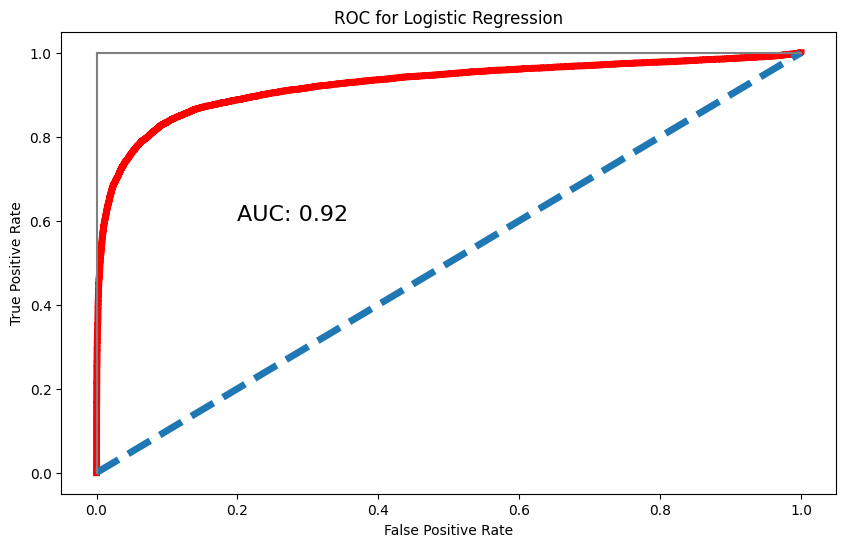

In [ ]:
#Vẽ ROC, AUC
y_probabilities = model_lr.predict_proba(X_test)[:,1] #điền tên model của bạn vào đây
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for Logistic Regression')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='red')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#####2. Gaussian Naive Bayes Classifier

In [ ]:
GNB = GaussianNB() #Gán mô hình từ thư viện vào biến GNB
GNB.fit(X_train, y_train) # Training mô hình

y_pred_gnb = GNB.predict(X_test) #Dự báo

In [ ]:
print("Độ chính xác của mô hình là: {}%".format(round(accuracy_score(y_test, y_pred_gnb)*100,2)))

Độ chính xác của mô hình là: 86.18%


Text(0.5, 23.52222222222222, 'Dự báo')

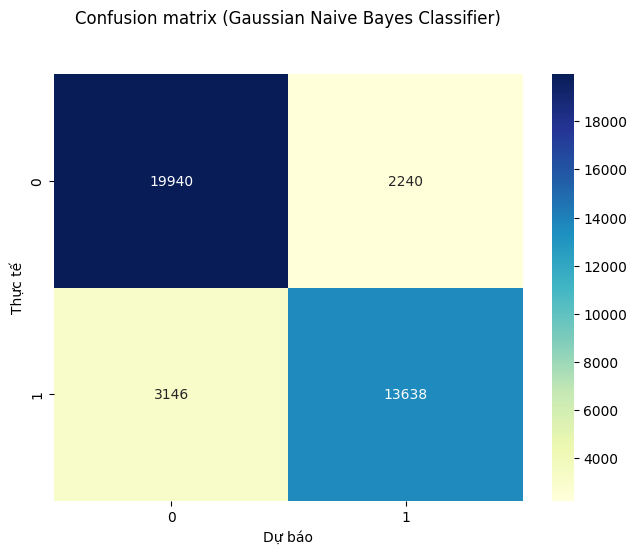

In [ ]:
#Vẽ confusion matrix
import seaborn as sns
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_gnb)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix (Gaussian Naive Bayes Classifier)', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')

In [ ]:
#In ra báo cáo đánh giá của mô hình (f1 score)
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     22180
           1       0.86      0.81      0.84     16784

    accuracy                           0.86     38964
   macro avg       0.86      0.86      0.86     38964
weighted avg       0.86      0.86      0.86     38964



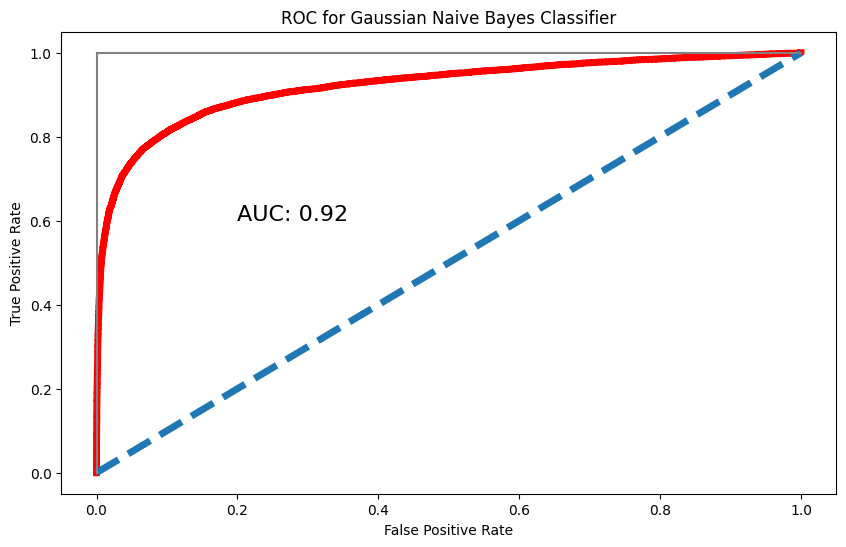

In [ ]:
#Vẽ ROC, AUC
y_probabilities = GNB.predict_proba(X_test)[:,1] #điền tên model của bạn vào đây
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for Gaussian Naive Bayes Classifier')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='red')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#####3. Decision Tree Classifer

In [ ]:
from sklearn import tree
model_tree = tree.DecisionTreeClassifier(criterion = 'log_loss')
model_tree.fit(X_train, y_train) #Training mô hình

y_pred_tree = model_tree.predict(X_test)

In [ ]:
print("Độ chính xác của mô hình là: {}%".format(round(accuracy_score(y_test,y_pred_tree)*100,2)))

Độ chính xác của mô hình là: 94.91%


Text(0.5, 23.52222222222222, 'Dự báo')

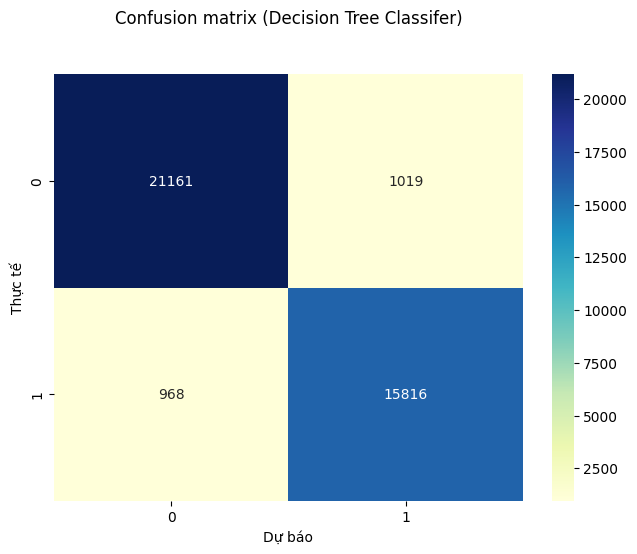

In [ ]:
#Vẽ confusion matrix
import seaborn as sns
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_tree)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix (Decision Tree Classifer)', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')

In [ ]:
#In ra báo cáo đánh giá của mô hình (f1 score)
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96     22180
           1       0.94      0.94      0.94     16784

    accuracy                           0.95     38964
   macro avg       0.95      0.95      0.95     38964
weighted avg       0.95      0.95      0.95     38964



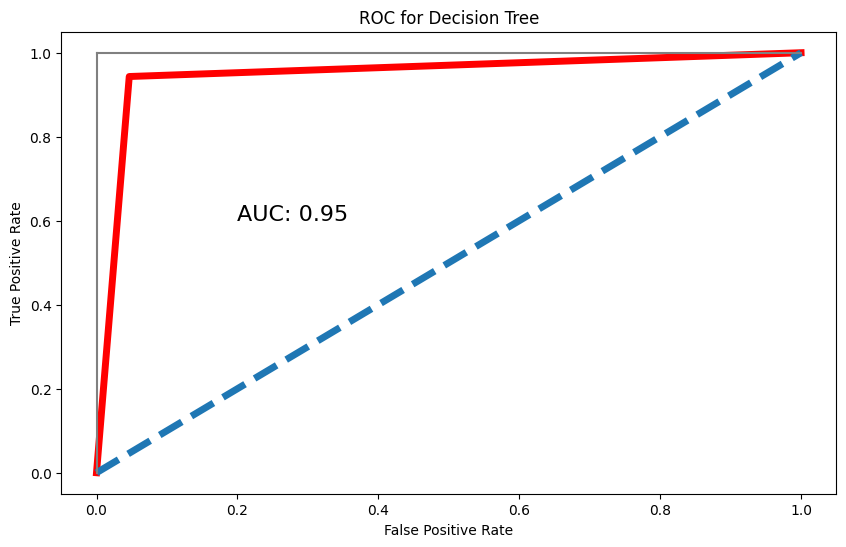

In [ ]:
#Vẽ ROC, AUC
y_probabilities = model_tree.predict_proba(X_test)[:,1] #điền tên model của bạn vào đây
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for Decision Tree')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='red')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#####4. Random Forest Classifer

In [ ]:
model_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 10)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

In [ ]:
print("Độ chính xác của mô hình là: {}%".format(round(accuracy_score(y_test, y_pred_rf)*100,2)))

Độ chính xác của mô hình là: 95.72%


Text(0.5, 23.52222222222222, 'Dự báo')

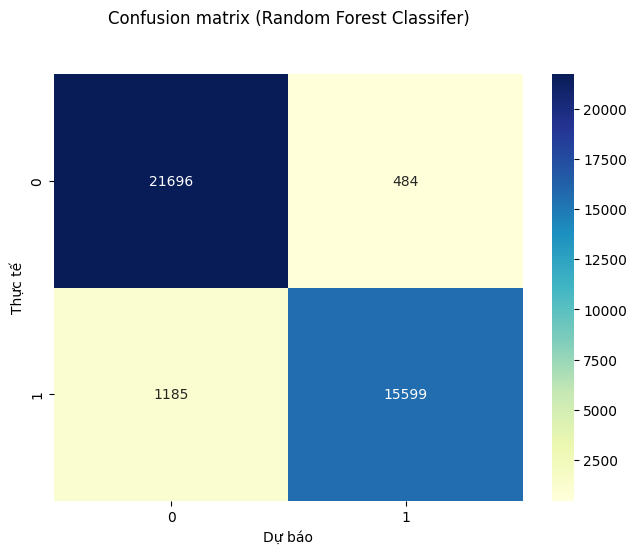

In [ ]:
#Vẽ confusion matrix
import seaborn as sns
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_rf)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix (Random Forest Classifer)', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')

In [ ]:
#In ra báo cáo đánh giá của mô hình (f1 score)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     22180
           1       0.97      0.93      0.95     16784

    accuracy                           0.96     38964
   macro avg       0.96      0.95      0.96     38964
weighted avg       0.96      0.96      0.96     38964



In [ ]:
score_total=[]
for i in range(2,20,1):
  model_rf = RandomForestClassifier(n_estimators =i,  random_state = 0)
  model_rf.fit(X_train, y_train)
  score_total.append(accuracy_score(y_test, y_pred_rf))
  print("Accuracy at n =",i,accuracy_score(y_test, y_pred_rf))


Accuracy at n = 2 0.9571655887485885
Accuracy at n = 3 0.9571655887485885
Accuracy at n = 4 0.9571655887485885
Accuracy at n = 5 0.9571655887485885
Accuracy at n = 6 0.9571655887485885
Accuracy at n = 7 0.9571655887485885
Accuracy at n = 8 0.9571655887485885
Accuracy at n = 9 0.9571655887485885
Accuracy at n = 10 0.9571655887485885
Accuracy at n = 11 0.9571655887485885
Accuracy at n = 12 0.9571655887485885
Accuracy at n = 13 0.9571655887485885
Accuracy at n = 14 0.9571655887485885
Accuracy at n = 15 0.9571655887485885
Accuracy at n = 16 0.9571655887485885
Accuracy at n = 17 0.9571655887485885
Accuracy at n = 18 0.9571655887485885
Accuracy at n = 19 0.9571655887485885


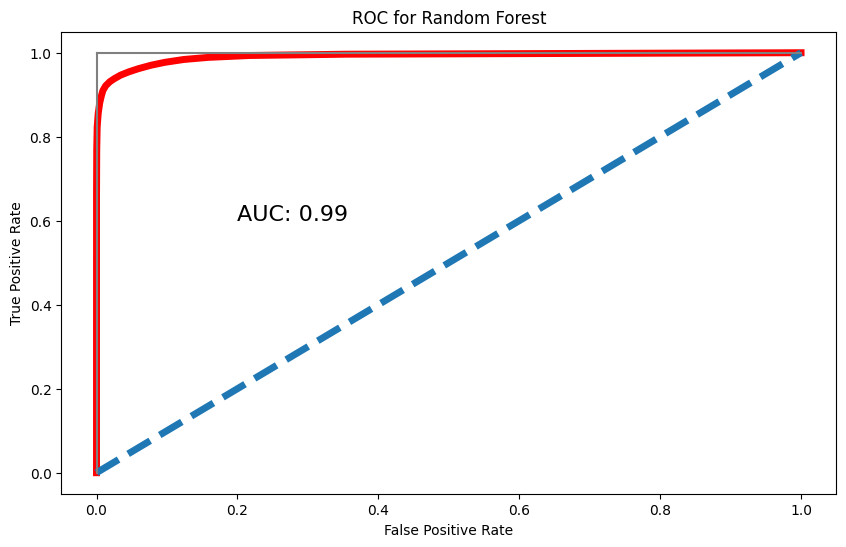

In [ ]:
#Vẽ ROC, AUC
y_probabilities = model_rf.predict_proba(X_test)[:,1] #điền tên model của bạn vào đây
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for Random Forest')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='red')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#####5. KNeighbors Classifer

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X,y)#Training

y_pred_knn = model_knn.predict(X_test)

In [ ]:
print("Độ chính xác của mô hình là: {}%".format(round(accuracy_score(y_test,y_pred_knn)*100,2)))

Độ chính xác của mô hình là: 96.29%


Text(0.5, 23.52222222222222, 'Dự báo')

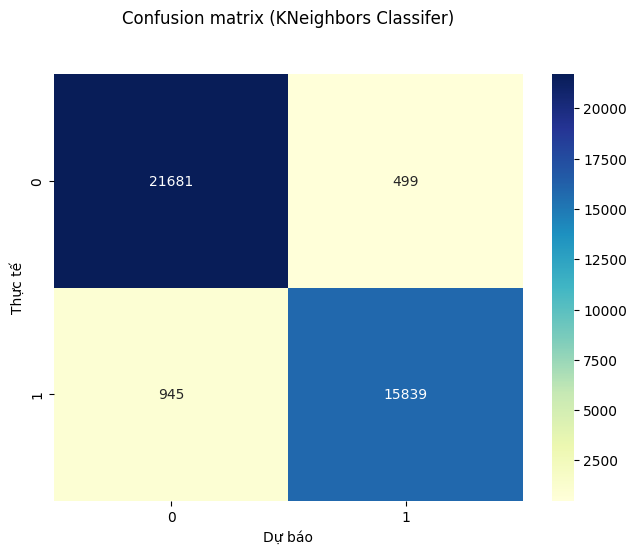

In [ ]:
#Vẽ confusion matrix
import seaborn as sns
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_knn)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix (KNeighbors Classifer)', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')

In [ ]:
#In ra báo cáo đánh giá của mô hình (f1 score)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     22180
           1       0.97      0.94      0.96     16784

    accuracy                           0.96     38964
   macro avg       0.96      0.96      0.96     38964
weighted avg       0.96      0.96      0.96     38964



In [ ]:
ac=[] #Tạo list rỗng chứa giá trị của độ chính xác
for k in range (2,20):
  model_knn = KNeighborsClassifier(n_neighbors=k)
  model_knn.fit(X,y)#Training
  y_pred_knn = model_knn.predict(X_test)
  ac.append(metrics.accuracy_score(y_test, y_pred_knn))
  print("Accuracy at k =",k,metrics.accuracy_score(y_test, y_pred_knn))

Accuracy at k = 2 0.9591674366081511
Accuracy at k = 3 0.9629401498819423
Accuracy at k = 4 0.9516990042090134
Accuracy at k = 5 0.9536751873524278
Accuracy at k = 6 0.9461297608048455
Accuracy at k = 7 0.9478749615029258
Accuracy at k = 8 0.9429986654347603
Accuracy at k = 9 0.9446925367005441
Accuracy at k = 10 0.9406888409814187
Accuracy at k = 11 0.9427420182732779
Accuracy at k = 12 0.9391232932963761
Accuracy at k = 13 0.9408684939944564
Accuracy at k = 14 0.9377887280566677
Accuracy at k = 15 0.9390719638640797
Accuracy at k = 16 0.9364541628169593
Accuracy at k = 17 0.9373267631659994
Accuracy at k = 18 0.9356072271840673
Accuracy at k = 19 0.9368134688430346


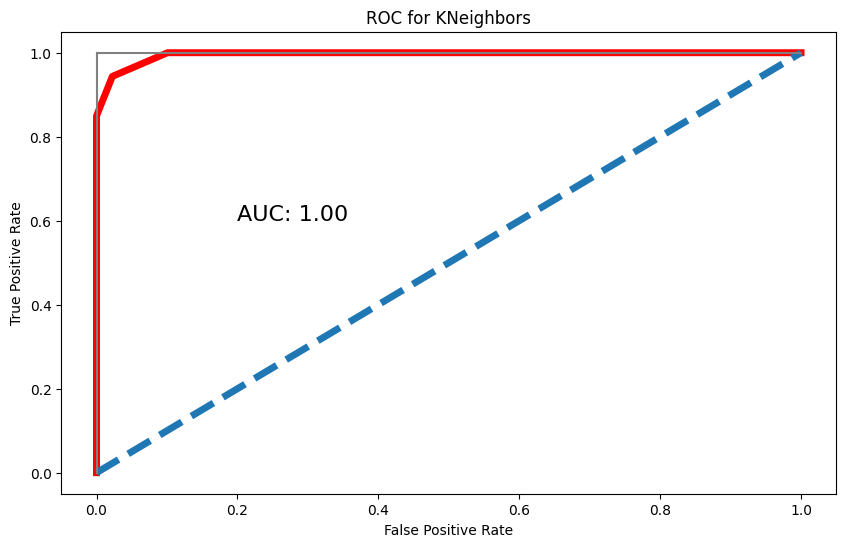

In [ ]:
#Vẽ ROC, AUC
y_probabilities = model_knn.predict_proba(X_test)[:,1] #điền tên model của bạn vào đây
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for KNeighbors')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='red')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#####6. LightGBM Classifier

In [ ]:
Lig = lgb.LGBMClassifier()
Lig.fit(X_train, y_train)

y_pred_lig= Lig.predict(X_test)

In [ ]:
print("Độ chính xác của mô hình là: {}%".format(round(Lig.score(X_test, y_test)*100,2)))

Độ chính xác của mô hình là: 96.33%


Text(0.5, 23.52222222222222, 'Dự báo')

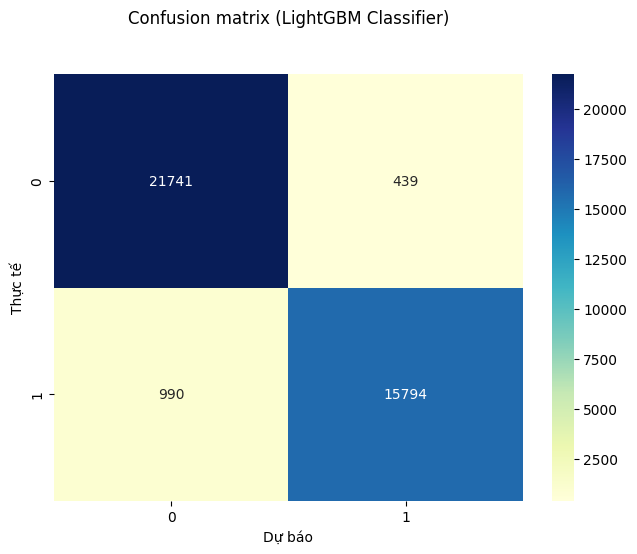

In [ ]:
#Vẽ confusion matrix
import seaborn as sns
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_lig)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix (LightGBM Classifier)', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')

In [ ]:
#In ra báo cáo đánh giá của mô hình (f1 score)
print(classification_report(y_test, y_pred_lig))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     22180
           1       0.97      0.94      0.96     16784

    accuracy                           0.96     38964
   macro avg       0.96      0.96      0.96     38964
weighted avg       0.96      0.96      0.96     38964



In [ ]:
hps={
    'num_leaves': [1, 10,100,1000],
     'learning_rate' : [0.00001, 0.0001, 0.001, 0.01, 1],
     'n_estimators' : [1, 10,100,1000],
}
Random= RandomizedSearchCV(Lig, hps)

In [ ]:
Random.fit(X_train, y_train)

y_pred=Random.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     22180
           1       0.96      0.94      0.95     16784

    accuracy                           0.96     38964
   macro avg       0.96      0.96      0.96     38964
weighted avg       0.96      0.96      0.96     38964



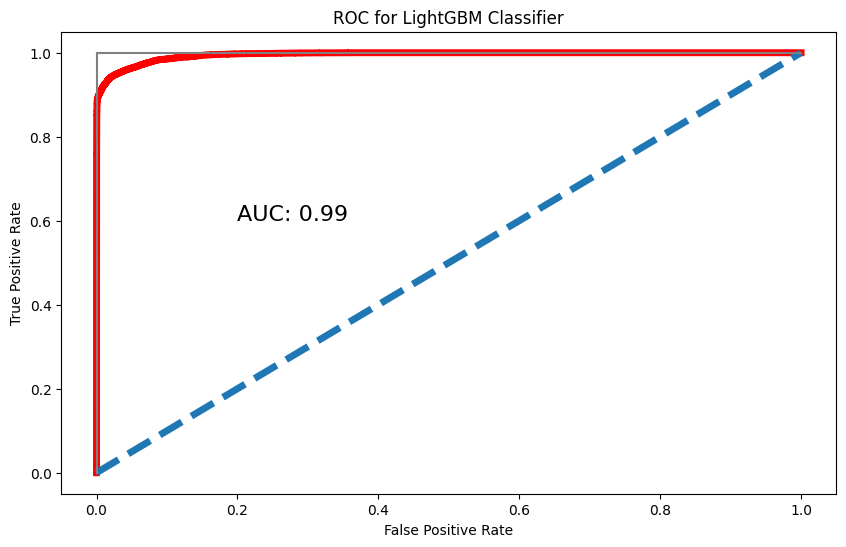

In [ ]:
#Vẽ ROC, AUC
y_probabilities = Lig.predict_proba(X_test)[:,1] #điền tên model của bạn vào đây
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for LightGBM Classifier')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='red')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### So sánh các mô hình - Model Comparison

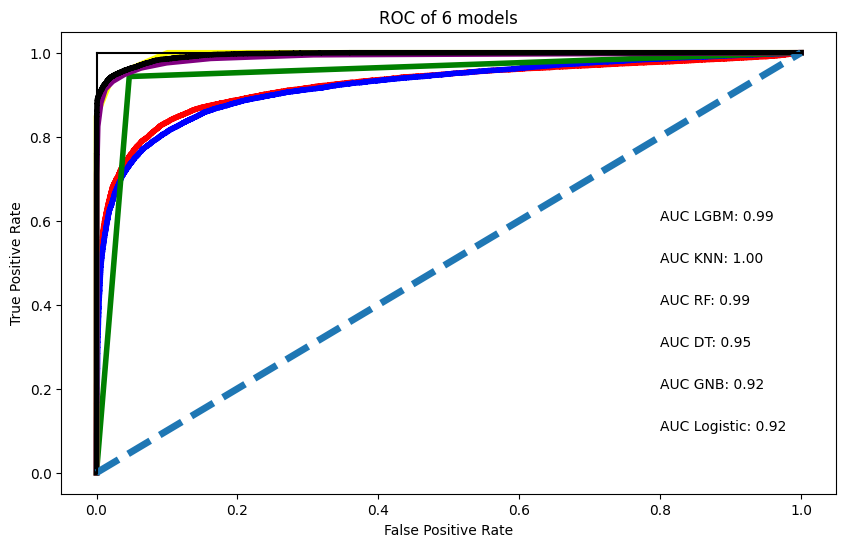

In [ ]:
# ROC and AUC
y_prob_lr = model_lr.predict_proba(X_test)[:,1]

y_prob_gnb = GNB.predict_proba(X_test)[:,1]

y_prob_dt = model_tree.predict_proba(X_test)[:,1]

y_prob_rf = model_rf.predict_proba(X_test)[:,1]

y_prob_knn = model_knn.predict_proba(X_test)[:,1]

y_prob_lig = Lig.predict_proba(X_test)[:,1]


FPR1, TPR1, threshold1 = roc_curve(y_test,y_prob_lr)
FPR2, TPR2, threshold2 = roc_curve(y_test,y_prob_gnb)
FPR3, TPR3, threshold3 = roc_curve(y_test,y_prob_dt)
FPR4, TPR4, threshold4 = roc_curve(y_test,y_prob_rf)
FPR5, TPR5, threshold5 = roc_curve(y_test,y_prob_knn)
FPR6, TPR6, threshold6 = roc_curve(y_test,y_prob_bag)
FPR7, TPR7, threshold7 = roc_curve(y_test,y_prob_lig)

plt.figure(figsize=(10,6))

plt.title('ROC of 6 models')

plt.plot(FPR1, TPR1, linewidth = 4, color = 'red')

plt.plot(FPR2, TPR2, linewidth = 4, color = 'blue')

plt.plot(FPR3, TPR3, linewidth = 4, color = 'green')

plt.plot(FPR4, TPR4, linewidth = 4, color = 'pink')

plt.plot(FPR5, TPR5, linewidth = 4, color = 'yellow')

plt.plot(FPR6, TPR6, linewidth = 4, color = 'purple')

plt.plot(FPR7, TPR7, linewidth = 4, color = 'black')

plt.plot([0,1],ls='--',linewidth=5)

plt.plot([0,0],[1,0],c='0')

plt.plot([1,1],c='0')

plt.text(0.8,0.1,'AUC Logistic: {:.2f}'.format(roc_auc_score(y_test,y_prob_lr)),size= 10)

plt.text(0.8,0.2,'AUC GNB: {:.2f}'.format(roc_auc_score(y_test,y_prob_gnb)),size= 10)

plt.text(0.8,0.3,'AUC DT: {:.2f}'.format(roc_auc_score(y_test,y_prob_dt)),size= 10)

plt.text(0.8,0.4,'AUC RF: {:.2f}'.format(roc_auc_score(y_test,y_prob_rf)),size= 10)

plt.text(0.8,0.5,'AUC KNN: {:.2f}'.format(roc_auc_score(y_test,y_prob_knn)),size= 10)

plt.text(0.8,0.6,'AUC LGBM: {:.2f}'.format(roc_auc_score(y_test,y_prob_lig)),size= 10)

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.show()


|| <h2>***Model***|<h3>***Accuracy (%)***|<h3>***F1-Score***|<h3>***AUC Score***|
| --- | --- | --- | --- | --- |
| <h4>1.| <h4>Logistic Regression | <h4>87.26% | <h4>0.85 | <h4>0.92 |
| <h4>2.| <h4>GNB Classifier | <h4>86.18% | <h4>0.84 | <h4>0.92 |
| <h4>3.| <h4>Decision Tree Classifer | <h4>94.91% | <h4>0.94 | <h4>0.95 |
| <h4>4.| <h4>Random Forest Classifer | <h4>95.72% | <h4>0.95 | <h4>0.99 |
| <h4>5.| <h4>KNeighbors Classifer | <h4>96.29% | <h4>0.96 | <h4>1.00 |
| <h4>6.| <h4>LightGBM Classifier (Based DT) | <h4>96.33% | <h4>0.96 | <h4>0.99 |

***Có thể các thấy mô hình tốt nhất là KNeighbors Classifer, Random Forest Classifer và LightGBM Classifier. 3 mô hình kể trên đều có phần trăm dự đoán đúng cao (96%), điểm f1 cao (0.96) và điểm AUC cao (1.0)***